#### imports

In [1]:
import tensorflow as tf
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
print("TF Version:", tf.__version__ )

TF Version: 2.6.0


# Part 1

In [19]:
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
xs = tf.constant(X.astype(np.float32))
ys = tf.constant(Y.astype(np.float32))

In [20]:
#compute gaussian OG
zs = tf.exp(-(xs**2 + ys**2)/2.0)

In [21]:
#compute sine
theta = np.pi
f = 1
zs = tf.math.sin(2 * np.pi * f * (xs * tf.math.cos(theta) + ys * tf.math.sin(theta)))

In [22]:
#product of two functions
theta = np.pi / 4
f = 1
zs = (tf.exp(-(xs**2 + ys**2)/2.0)) * (tf.math.sin(2 * np.pi * f * (xs * tf.math.cos(theta) + ys * tf.math.sin(theta))))

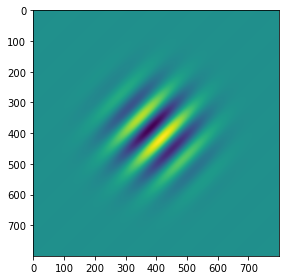

In [23]:
plt.imshow(zs.numpy())
plt.tight_layout()
plt.show()

# Part 2

In [2]:
#base layout
Y, X = np.mgrid[-1.3:1.3:0.0005, -2:1:0.0005]
Z = X+1j*Y
#for different zoom
def zoom (Z, offset, zoom):
    '''
    takes in how much you want to offset the fractal to the left, and then how many times bigger you want to make the fractal
    '''
    return ((Z - offset) * 1/zoom)

# Z = zoom(Z, 8, 5.5)

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

In [3]:
#mandelbrot
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    zs.assign(zs_)

In [26]:
#julia
c = 0.4 - 0.27j
for i in range(200):
    #Compute the new values of z: z^2 + x
    zs_ = zs*zs + c
    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4
    # Update variables to compute
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    zs.assign(zs_)

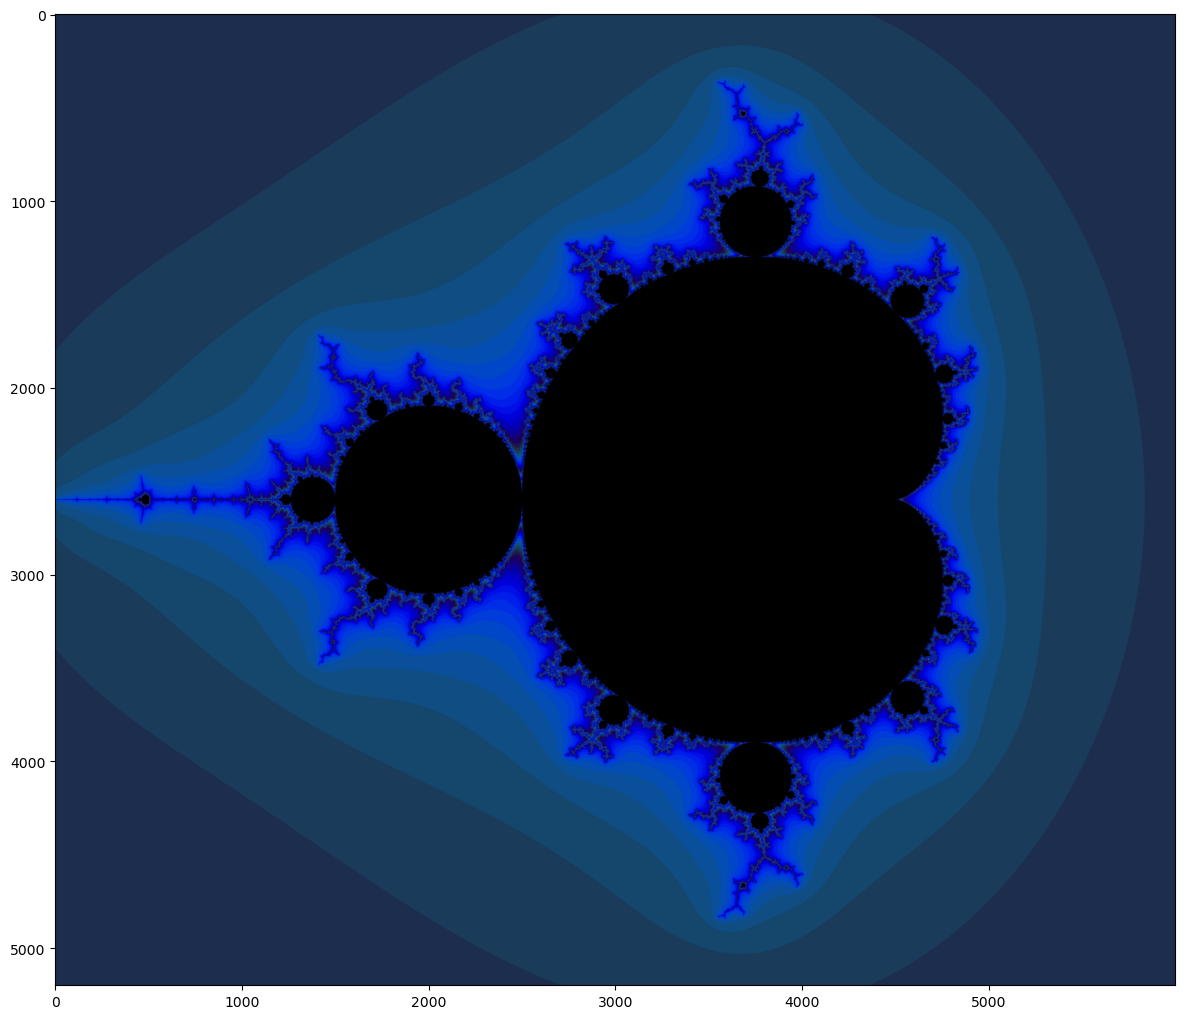

In [4]:
fig = plt.figure(figsize=(16,10))
def processFractal(a):
    """Display an array of iteration counts as a
    colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
    img = np.concatenate([10+20*np.cos(a_cyclic),
    30+50*np.sin(a_cyclic),
    155-80*np.cos(a_cyclic)], 2)
    img[a==a.max()] = 0
    a = img
    a = np.uint8(np.clip(a, 0, 255))
    return a
    
plt.imshow(processFractal(ns.numpy()))
plt.tight_layout(pad=0)
plt.show()

# Part 3

# The Lorenz Attractor
_Author: Alex Viller_
_Last Update: 17/08/2022_

This module computes and displays the Lorenz Attractor with $\sigma = 16$, $\rho = 40$, $\beta = 4$. This gives the attractor fractal properties

## Result Figure
![Lorenz Attractor](figure.png)

## References
[https://en.wikipedia.org/wiki/Lorenz_system](https://en.wikipedia.org/wiki/Lorenz_system) - Visited on 17/08/2022

[The fractal dimension of the Lorenz attractor - Mark J.McGuinness](https://doi.org/10.1016/0375-9601(83)90052-X) - Visited on 17/08/2022

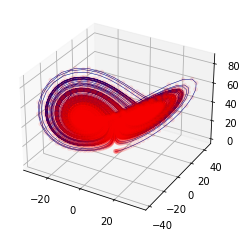

In [28]:
# https://doi.org/10.1016/0375-9601(83)90052-X

# using the sigma, rho and beta values that make the lorenz attractor a fractal
# according to wikipedia
def lorenz(x, y, z, sigma=16.0, rho=40.0, beta=4.0):
    # lorenz equations
    x_dot = sigma * (y - x)
    y_dot = rho * x - y - x * z
    z_dot = x * y - beta * z

    return x_dot, y_dot, z_dot

# setting dt and number of steps for appropriate clarity
dt=0.01
num_steps = 10000

# initialise empty array and initial values for a clean spiral
xs, ys, zs = np.empty(num_steps + 1), np.empty(num_steps + 1), np.empty(num_steps + 1)
xs[0], ys[0], zs[0] = 0.0, 1.0, 1.05

# itterate over array calculating what the new value should be in each case based on previous values
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i+1] = xs[i] + x_dot * dt
    ys[i+1] = ys[i] + y_dot * dt
    zs[i+1] = zs[i] + z_dot * dt
    # each next point relies on the previous point of all 3 so if you were to do these actions in parallel 
    # they would just have to wait for each other anyway thus parallelism is pointless and introduces 
    # unnecassary convolution to the code making it harder to read


# do a 3d projection of the plot making it pretty with some colour choices
fig = plt.subplot(projection="3d")
fig.plot(xs, ys, zs, lw=0.5, color="navy")
fig.scatter(xs, ys, zs, lw=0.1, alpha=0.1, color="red")

plt.show()